# GoITNeo Algo FP

## Task 1. Data Structures. Sorting. Working with Linked List

To implement a Linked List, you need to:
 - write a function that implements reversing a Linked List by changing the references between nodes
 - develop a sorting algorithm for a LL, such as insertion sort or merge sort
 - write a function that merges two sorted LLs into one sorted list

### Solution
A class ```LinkedList``` is implemented in file LinkedList.py.
#### List of supported methods:
 - ```insert_at_beginning``` - add a node at the beginning
 - ```insert_at_end``` - add node at the end
 - ```insert_from``` - add nodes at the beginning from a list and return the LL
 - ```insert_after``` - insert node after the given node
 - ```delete_node``` - find and delete the given node
 - ```search_node``` - find node
 - ```reverse_inplace``` - reverse current LL inplace (without creation a new LL)
 - ```reverse``` - reverse and return LL, create a new LL if ```inplace=False```
 - ```sort``` - return current LL sorted inplace
 - ```merge_sorted``` - add to current sorted LL another sorted LL and return current LL

In [9]:
from LinkedList import LinkedList

LL1 = LinkedList()
LL1.insert_from([2,3,3,1,2,3,4])
LL1.sort()
print(f"Sorted LL1: {LL1}")
LL2 = LinkedList().insert_from([5, 0, 1, 2]).sort()
print(f"Sorted LL2: {LL2}")
LL1.merge_sorted(LL2)
print(f"Merged LL:  {LL1}")

Sorted LL1: [1, 2, 2, 3, 3, 3, 4]
Sorted LL2: [0, 1, 2, 5]
Merged LL:  [0, 1, 1, 2, 2, 2, 3, 3, 3, 4, 5]


## Task 2. Recursion. Creating a "Pythagoras Tree" Fractal Using Recursion

Write a program in Python that uses recursion to create the "Pythagoras Tree" fractal. The program should visualize the "Pythagoras Tree" fractal, and the user should be able to specify the level of recursion.

![Pythagoras Tree](data/PythagorasTree.png)

### Solution
"Pythagoras Tree" is implemented in file ```PythagorasTree.py```.
The script can get one optional input parameter ```n``` (default value is 6). This parameter defines a recursion level and as result a complexity of the tree.

**Additional feature:** the color of the three is changed gradually from dark-green (base) to light-green (leafs).

#### Usage:
```python
python PythagorasTree.py 10
```

#### Result:
![Pythagoras Tree my result](data/PythagorasTree_result.png)

## Task 3. Trees, Dijkstra's Algorithm

Develop Dijkstra's algorithm to find the shortest paths in a weighted graph using a binary heap. The task includes creating a graph, using a heap to optimize vertex selection, and calculating the shortest paths from the starting vertex to all others.

### Solution
The Dijkstra's algorithm to find the shortest paths in a weighted graph using a binary heap is implemented in file ```DijkstraOnHeap.py```.\
Function ```dijkstra_on_heap``` gets input:
 - graph: the graph to work with
 - start: the vertex to start from

Returns:
 - dictionary: minimal distances from the 'start' to each vertex in the graph

Function ```find_all_distances``` finds all minimal distances between all vertexes in the given graph using ```dijkstra_on_heap```.\
Input:
 - graph: the graph to work with

Return:
 - dictionary: minimal distances from each vertex to each vertex in the graph

In [4]:
import networkx as nx
import pandas as pd
from DijkstraOnHeap import find_all_distances

graph = nx.Graph()
graph.add_nodes_from(["A", "B", "C", "D"])
graph.add_edge("A", "B", weight=1)
graph.add_edge("A", "C", weight=5)
graph.add_edge("C", "B", weight=3)
graph.add_edge("C", "D", weight=10)

print(pd.DataFrame( find_all_distances(graph) ))

    C   A   B   D
A   4   0   1  14
B   3   1   0  13
C   0   4   3  10
D  10  14  13   0


## Task 4. Pyramid Visualization

The following code builds binary trees. Analyze the code to understand how it works.
```python
import uuid

import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, key, color="skyblue"):
        self.left = None
        self.right = None
        self.val = key
        self.color = color  # additional argument for storing the color of the node.
        self.id = str(uuid.uuid4())  # unique identifier for each node

def add_edges(graph, node, pos, x=0, y=0, layer=1):
    if node is not None:
        graph.add_node(node.id, color=node.color, label=node.val)  # using an ID and storing the node value
        if node.left:
            graph.add_edge(node.id, node.left.id)
            l = x - 1 / 2 ** layer
            pos[node.left.id] = (l, y - 1)
            l = add_edges(graph, node.left, pos, x=l, y=y - 1, layer=layer + 1)
        if node.right:
            graph.add_edge(node.id, node.right.id)
            r = x + 1 / 2 ** layer
            pos[node.right.id] = (r, y - 1)
            r = add_edges(graph, node.right, pos, x=r, y=y - 1, layer=layer + 1)
    return graph

def draw_tree(tree_root):
    tree = nx.DiGraph()
    pos = {tree_root.id: (0, 0)}
    tree = add_edges(tree, tree_root, pos)

    colors = [node[1]['color'] for node in tree.nodes(data=True)]
    labels = {node[0]: node[1]['label'] for node in tree.nodes(data=True)}  # use the node value for labels

    plt.figure(figsize=(8, 5))
    nx.draw(tree, pos=pos, labels=labels, arrows=False, node_size=2500, node_color=colors)
    plt.show()

# create a tree
root = Node(0)
root.left = Node(4)
root.left.left = Node(5)
root.left.right = Node(10)
root.right = Node(1)
root.right.left = Node(3)

draw_tree(root)

```
![Binary Heap](data/BinaryHeap.png)

Using this code, build a function that visualizes a binary heap.

### Solution

The function ```build_tree``` is implemented as a method of class ```HeapTree```.\
The result can be shown with method ```show```.

HeapTree: [2, 32, 2, 52, 35, 53, 67, 57, 70, 37, 63, 53, 72, 68, 98, 60, 95, 71, 75, 48, 81, 84, 86, 60]


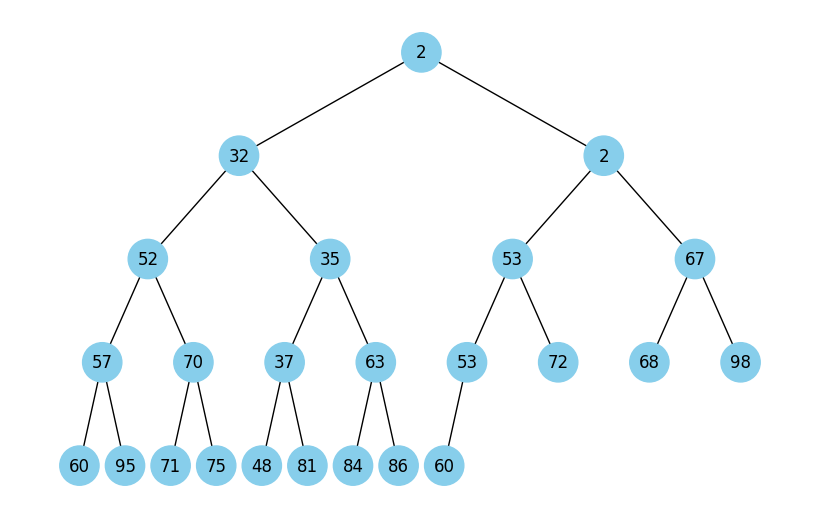

Push '40'
HeapTree: [2, 32, 2, 52, 35, 40, 67, 57, 70, 37, 63, 53, 72, 68, 98, 60, 95, 71, 75, 48, 81, 84, 86, 60, 53]


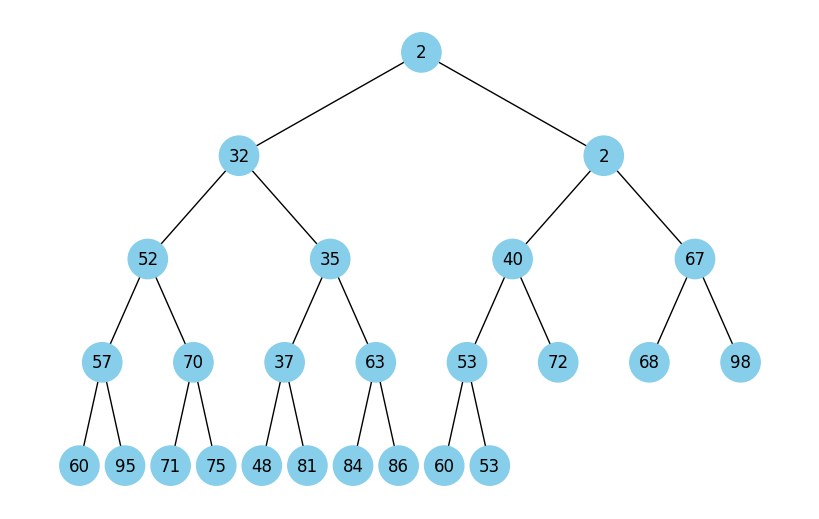

Pop value: 2
HeapTree: [2, 32, 40, 52, 35, 53, 67, 57, 70, 37, 63, 53, 72, 68, 98, 60, 95, 71, 75, 48, 81, 84, 86, 60]


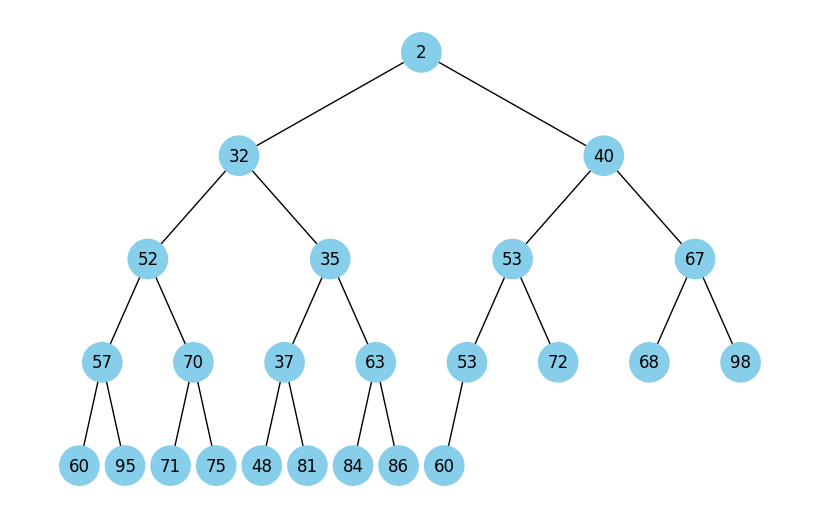

In [12]:
from numpy import random
from HeapTree import HeapTree

ht = HeapTree(random.randint(99, size=24))
print(f"HeapTree: {ht}")
ht.show()
print("Push '40'")
ht.push(40)
print(f"HeapTree: {ht}")
ht.show()
print(f"Pop value: {ht.pop()}")
print(f"HeapTree: {ht}")
ht.show()

## Task 5. Visualization of Binary Tree Traversal

Using the code from Task 4 to build a binary tree, you need to create a Python program that visualizes tree traversals: in-depth and in width.
It should display each step in nodes with different colors, using the RGB 16-bit system (example #1296F0). Node colors should vary from dark to light shades, depending on the traversal sequence. Each node when visited should receive a unique color that visually represents the traversal order.

### Solution
Let's take the same class ```HeapTree``` and implement methods ```dfs``` and ```bfs```. These functions go through the heap tree and gradually change the color of each node from dark to light.

HeapTree: [5, 6, 20, 28, 28, 24, 45, 86, 53, 59, 34, 53, 44, 65, 92, 89, 88, 98, 73, 79]
DFS order: [5, 6, 28, 86, 89, 88, 53, 98, 73, 28, 59, 79, 34, 20, 24, 53, 44, 45, 65, 92]


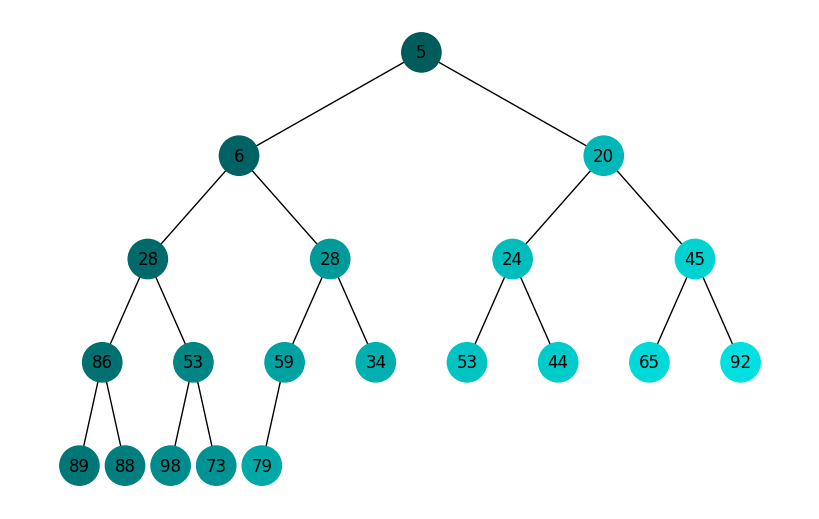

In [2]:
from numpy import random
from HeapTree import HeapTree

ht = HeapTree(random.randint(99, size=20))
print(f"HeapTree: {ht}")
print(f"DFS order: {ht.dfs()}")
ht.show()

HeapTree: [0, 2, 1, 6, 8, 44, 24, 14, 29, 64, 20, 95, 60, 41, 62, 28, 88, 75, 47, 84, 67, 38]
BFS order: [0, 2, 1, 6, 8, 44, 24, 14, 29, 64, 20, 95, 60, 41, 62, 28, 88, 75, 47, 84, 67, 38]


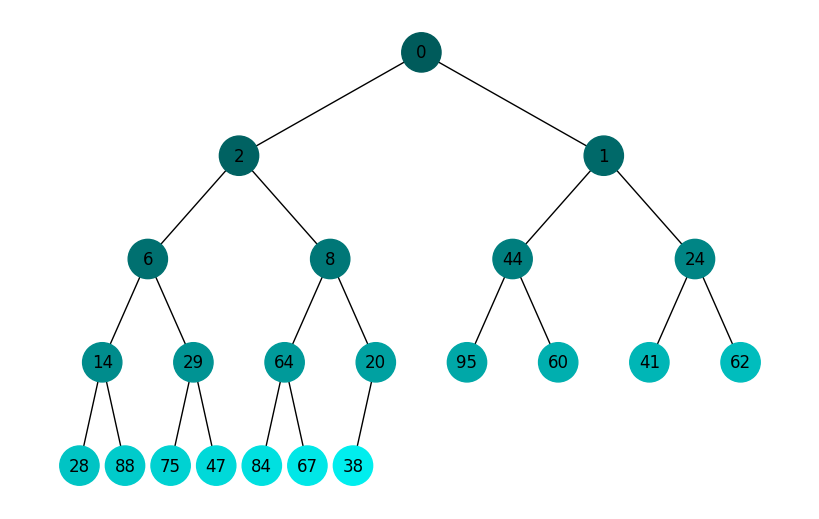

In [4]:
from numpy import random
from HeapTree import HeapTree

ht = HeapTree(random.randint(99, size=22))
print(f"HeapTree: {ht}")
print(f"BFS order: {ht.bfs()}")
ht.show()

## Task 6: Greedy Algorithms and Dynamic Programming

Write a Python program that uses two approaches - a greedy algorithm and dynamic programming algorithm to solve the problem of selecting food with the highest total calories within a limited budget.
Each type of food has a specified cost and calorie content. Food data is represented as a dictionary, where the key is the name of the dish, and the value is a dictionary with the cost and calorie content.
```python
items = {
    "pizza":     {"cost": 50, "calories": 300},
    "hamburger": {"cost": 40, "calories": 250},
    "hot-dog":   {"cost": 30, "calories": 200},
    "pepsi":     {"cost": 10, "calories": 100},
    "cola":      {"cost": 15, "calories": 220},
    "potato":    {"cost": 25, "calories": 350},
}
```
Write the function ```greedy_algorithm``` for the greedy algorithm, which selects dishes maximizing the calorie-to-cost ratio without exceeding the specified budget.
To implement the dynamic programming algorithm, create the function ```dynamic_programming```, which calculates the optimal set of dishes to maximize calorie intake within a given budget.

### Solution
Functions ```greedy_algorithm``` and ```dynamic_programming``` are implemented in file ```GreedyVsDynamic.py```.
Let's compare results of both algorithms and print only different results.

In [10]:
import GreedyVsDynamic

total_cost = sum( i["cost"] for i in GreedyVsDynamic.items.values() )
print("Total cost:", total_cost)
for budget in range(5, total_cost, 5):
    r1 = GreedyVsDynamic.greedy_algorithm(budget)
    r2 = GreedyVsDynamic.dynamic_programming(budget)
    if r2[0] != r1[0]:
        print(f"Budget: {budget}")
        print(f"Greedy alg:   {r1[0]} ({', '.join(r1[1])})")
        print(f"Dynamic prog: {r2[0]} ({', '.join(r2[1])})")

Total cost: 170
Budget: 25
Greedy alg:   320 (cola, pepsi)
Dynamic prog: 350 (potato)
Budget: 30
Greedy alg:   320 (cola, pepsi)
Dynamic prog: 350 (potato)
Budget: 35
Greedy alg:   320 (cola, pepsi)
Dynamic prog: 450 (pepsi, potato)
Budget: 70
Greedy alg:   670 (cola, potato, pepsi)
Dynamic prog: 770 (hot-dog, cola, potato)
Budget: 75
Greedy alg:   670 (cola, potato, pepsi)
Dynamic prog: 770 (hot-dog, cola, potato)
Budget: 90
Greedy alg:   870 (cola, potato, pepsi, hot-dog)
Dynamic prog: 920 (hamburger, pepsi, cola, potato)
Budget: 95
Greedy alg:   870 (cola, potato, pepsi, hot-dog)
Dynamic prog: 920 (hamburger, pepsi, cola, potato)
Budget: 100
Greedy alg:   870 (cola, potato, pepsi, hot-dog)
Dynamic prog: 970 (pizza, pepsi, cola, potato)
Budget: 105
Greedy alg:   870 (cola, potato, pepsi, hot-dog)
Dynamic prog: 970 (pizza, pepsi, cola, potato)
Budget: 110
Greedy alg:   870 (cola, potato, pepsi, hot-dog)
Dynamic prog: 1020 (hamburger, hot-dog, cola, potato)
Budget: 115
Greedy alg:   87

### Conclusions
As we can see greedy algorithms cannot give us the best result, while the solution based on dynamic programming gives the best result and can be faster for multiple calls (if we keep the solution table).

## Task 7: Using the Monte Carlo Method

Write a Python program that simulates a large number of dice rolls, calculates the sums of the numbers on the dice, and determines the probability of each possible sum.
Create a simulation where two dice are rolled a large number of times. For each roll, determine the sum of the numbers on both dice. Count how many times each possible sum (from 2 to 12) appears in the simulation. Using this data, calculate the probability of each sum.
Based on the simulations conducted, create a table or graph that displays the probabilities of each sum identified using the Monte Carlo method.
The table of probabilities of sums when rolling two dice looks as follows:

| Sum | Probability   |
|-----|---------------|
| 2	  | 2.78%  (1/36) |
| 3	  | 5.56%  (2/36) |
| 4	  | 8.33%  (3/36) |
| 5	  | 11.11% (4/36) |
| 6	  | 13.89% (5/36) |
| 7	  | 16.67% (6/36) |
| 8	  | 13.89% (5/36) |
| 9	  | 11.11% (4/36) |
| 10  | 8.33%  (3/36) |
| 11  | 5.56%  (2/36) |
| 12  | 2.78%  (1/36) |

Compare the results obtained using the Monte Carlo method with the analytical calculations provided in the table above.